# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [11]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

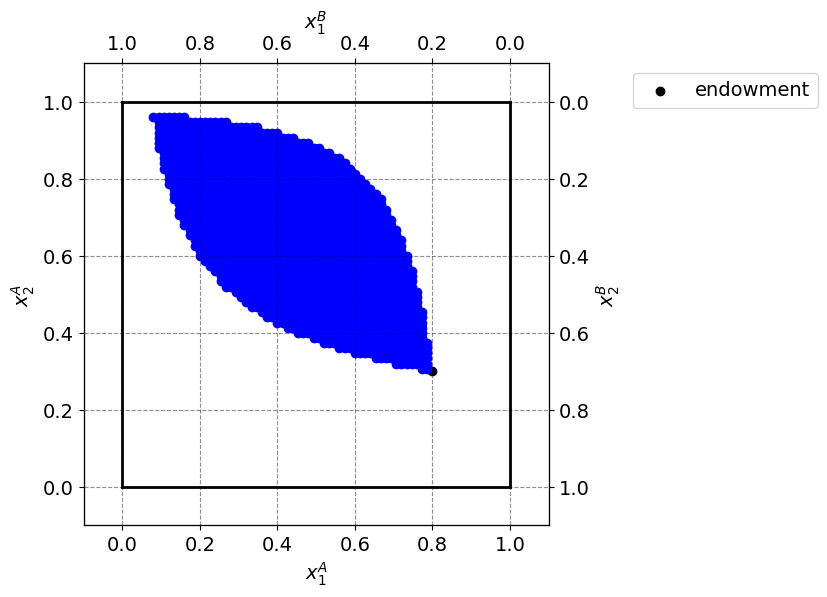

In [12]:
from inauguralproject import ExchangeEconomyClass

model = ExchangeEconomyClass()

par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

# Define the set C
def in_set_C(x1A, x2A):
    return model.utility_A(x1A, x2A) >= model.utility_A(model.par.w1A, model.par.w2A) and \
           model.utility_B(1 - x1A, 1 - x2A) >= model.utility_B(1 - model.par.w1A, 1 - model.par.w2A)

N = 75
allocations = np.linspace(0, 1, N + 1)

for x1A in allocations:
    for x2A in allocations:
        if in_set_C(x1A, x2A):
            plt.plot(x1A, x2A, 'bo') 

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='o',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

# Question 2

Explain your code and procedure

In [13]:
# Define the range of p1
N = 75
p1_range = np.linspace(0.5, 2.5, N + 1)

# Initialize lists to store errors
errors_1 = []
errors_2 = []

# Calculate errors for each p1 in the range
for p1 in p1_range:
    eps1, eps2 = model.check_market_clearing(p1)
    errors_1.append(eps1)
    errors_2.append(eps2)

# Print errors
print("Errors in market clearing conditions:")
for i, p1 in enumerate(p1_range):
    print(f"p1 = {p1:.4f}, ε1 = {errors_1[i]:.4f}, ε2 = {errors_2[i]:.4f}")

Errors in market clearing conditions:
p1 = 0.5000, ε1 = 0.5333, ε2 = -0.2667
p1 = 0.5267, ε1 = 0.4759, ε2 = -0.2507
p1 = 0.5533, ε1 = 0.4241, ε2 = -0.2347
p1 = 0.5800, ε1 = 0.3770, ε2 = -0.2187
p1 = 0.6067, ε1 = 0.3341, ε2 = -0.2027
p1 = 0.6333, ε1 = 0.2947, ε2 = -0.1867
p1 = 0.6600, ε1 = 0.2586, ε2 = -0.1707
p1 = 0.6867, ε1 = 0.2252, ε2 = -0.1547
p1 = 0.7133, ε1 = 0.1944, ε2 = -0.1387
p1 = 0.7400, ε1 = 0.1658, ε2 = -0.1227
p1 = 0.7667, ε1 = 0.1391, ε2 = -0.1067
p1 = 0.7933, ε1 = 0.1143, ε2 = -0.0907
p1 = 0.8200, ε1 = 0.0911, ε2 = -0.0747
p1 = 0.8467, ε1 = 0.0693, ε2 = -0.0587
p1 = 0.8733, ε1 = 0.0489, ε2 = -0.0427
p1 = 0.9000, ε1 = 0.0296, ε2 = -0.0267
p1 = 0.9267, ε1 = 0.0115, ε2 = -0.0107
p1 = 0.9533, ε1 = -0.0056, ε2 = 0.0053
p1 = 0.9800, ε1 = -0.0218, ε2 = 0.0213
p1 = 1.0067, ε1 = -0.0371, ε2 = 0.0373
p1 = 1.0333, ε1 = -0.0516, ε2 = 0.0533
p1 = 1.0600, ε1 = -0.0654, ε2 = 0.0693
p1 = 1.0867, ε1 = -0.0785, ε2 = 0.0853
p1 = 1.1133, ε1 = -0.0910, ε2 = 0.1013
p1 = 1.1400, ε1 = -0.1029,

# Question 3

Explain your code and procedure

In [14]:
# Find the index of the minimum absolute error
min_abs_error_index = np.argmin(np.abs(np.array(errors_1)) + np.abs(np.array(errors_2)))

# Get the corresponding market clearing price
market_clearing_price = p1_range[min_abs_error_index]

print("Market clearing price:", market_clearing_price)

Market clearing price: 0.9533333333333334


# Question 4a

# Question 4b

# Question 5a

# Question 5b

# Question 6a

# Question 6b

# Question 7

# Question 8

ADD CONCISE CONLUSION.